In [1]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import episcanpy.api as epi

STUD_PATH = '/mnt/workspace_stud/'
DATA_PATH = f'{STUD_PATH}mbentse/'
METADATA_PATH = f'{STUD_PATH}stud5/metadata/liver_sample_9_metadata.tsv'
OUTPUT_PATH = f'{STUD_PATH}stud2/notebooks/'
MOUSE_PATH = f'{STUD_PATH}stud2/scATAC_prepro/output_mus_musculus/data/sample1/'

results_file = f'{OUTPUT_PATH}liver_09_test.h5ad'

In [2]:
adata = ad.read(f'{DATA_PATH}catlas_objects/liver_sample_9.h5ad')
epi.pp.filter_cells(adata, min_features=1)
epi.pp.filter_features(adata, min_cells=1)
epi.pp.filter_features(adata, min_counts=1)
adata

AnnData object with n_obs × n_vars = 17500 × 1151566
    obs: 'nb_features'
    var: 'n_cells', 'n_counts'

In [3]:
adata.var

,n_cells,n_counts
index,,
chr1:9955-10355,65,83.0
chr1:29163-29563,97,173.0
chr1:79215-79615,10,12.0
chr1:102755-103155,17,25.0
chr1:267803-268203,60,95.0
...,...,...
chrY:56676947-56677347,89,91.0
chrY:56677442-56677842,225,234.0
chrY:56678029-56678429,235,241.0


In [ ]:
epi.pp.lazy(adata)
epi.tl.louvain(adata)
epi.tl.leiden(adata)
epi.pl.umap(adata, color=['louvain', 'leiden'], wspace=0.4)

In [4]:
adata.obs

,nb_features
index,
liver_sample_9_1+AACCAATAACATATGGTACCGTTCGTCTGACAGTCGGCAA,7397
liver_sample_9_1+AACCAATAACATGCTAACCTGTCGACCATTACCAGTTATT,5722
liver_sample_9_1+AACCAATAACCTAAGAGTTACGTTGATGATGAGAAGACCA,10445
liver_sample_9_1+AACCAATAACCTGGCAGCGGTTCTGGCGCACCGGTTAAGT,9986
liver_sample_9_1+AACCAATAACGGTCTAGGAACATATTGCATGAGATACCTC,7689
...,...
liver_sample_9_1+TTGGACGCGGTAGAACCTCCGATCCATAACTTAATTCGTA,1055
liver_sample_9_1+TTGGAGAACGGCATTAGGCGTTGCCTTATCTTGCTCGATT,2871
liver_sample_9_1+AATTATCTTGGAATGCCTTGTTCTGGCGCACAGTCGGCAA,6782


In [5]:
adata = ad.read(f'{DATA_PATH}catlas_objects/liver_sample_9.h5ad')
epi.pp.filter_cells(adata, min_features=1)
epi.pp.filter_features(adata, min_cells=1)
adata

AnnData object with n_obs × n_vars = 17500 × 1151566
    obs: 'nb_features'
    var: 'n_cells'

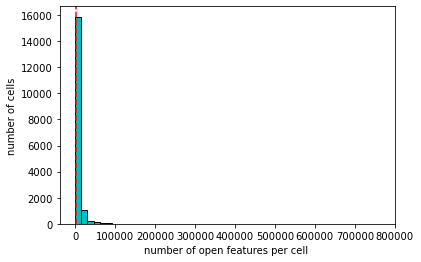

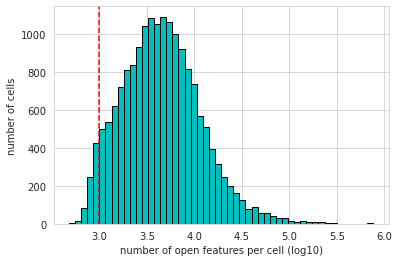

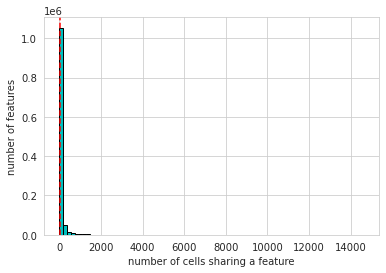

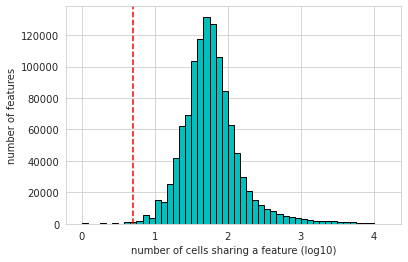

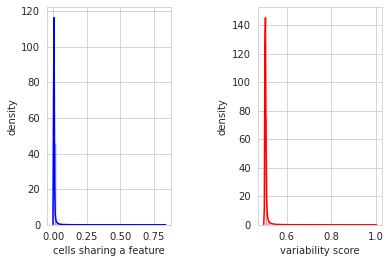

In [6]:
min_features = 1000

epi.pp.coverage_cells(adata, binary=True, log=False, bins=50,
               threshold=min_features)
epi.pp.coverage_cells(adata, binary=True, log=10, bins=50,
               threshold=min_features)

min_cells = 5

epi.pp.coverage_features(adata, binary=True, log=False, bins=50,
               threshold=min_cells)
epi.pp.coverage_features(adata, binary=True, log=10, bins=50,
               threshold=min_cells)

epi.pp.cal_var(adata)

epi.pp.normalize_total(adata)

epi.pp.log1p(adata)

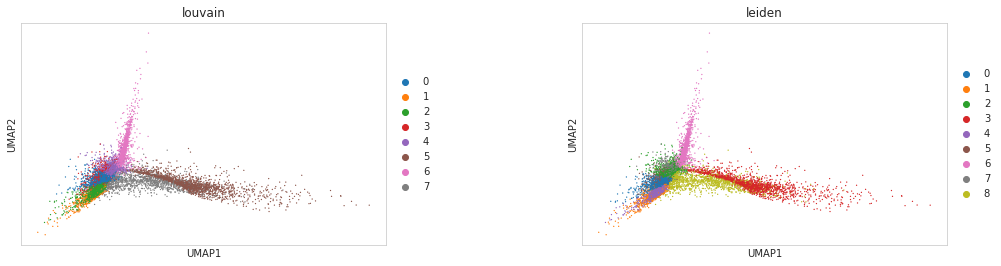

In [7]:
#ohne log
epi.pp.lazy(adata)
epi.tl.louvain(adata)
epi.tl.leiden(adata)
epi.pl.umap(adata, color=['louvain', 'leiden'], wspace=0.4)

In [ ]:
#mit log
epi.pp.lazy(adata)
epi.tl.louvain(adata)
epi.tl.leiden(adata)
epi.pl.umap(adata, color=['louvain', 'leiden'], wspace=0.4)

In [8]:
adata.obs

,nb_features,louvain,leiden
index,,,
liver_sample_9_1+AACCAATAACATATGGTACCGTTCGTCTGACAGTCGGCAA,10193.0,7,8
liver_sample_9_1+AACCAATAACATGCTAACCTGTCGACCATTACCAGTTATT,7920.0,5,3
liver_sample_9_1+AACCAATAACCTAAGAGTTACGTTGATGATGAGAAGACCA,13742.0,7,8
liver_sample_9_1+AACCAATAACCTGGCAGCGGTTCTGGCGCACCGGTTAAGT,14533.0,5,3
liver_sample_9_1+AACCAATAACGGTCTAGGAACATATTGCATGAGATACCTC,10521.0,5,3
...,...,...,...
liver_sample_9_1+TTGGACGCGGTAGAACCTCCGATCCATAACTTAATTCGTA,1510.0,6,6
liver_sample_9_1+TTGGAGAACGGCATTAGGCGTTGCCTTATCTTGCTCGATT,4047.0,6,6
liver_sample_9_1+AATTATCTTGGAATGCCTTGTTCTGGCGCACAGTCGGCAA,9896.0,6,6


In [ ]:
?epi.ct.bld_atac_mtx

In [ ]:
?epi.ct.bld_mtx_fly

In [ ]:
?epi.pp.downsample_counts

In [ ]:
?epi.ct.save_sparse_mtx

In [ ]:
epi.pp.filter_features(adata, min_counts=1)

In [9]:
adata

AnnData object with n_obs × n_vars = 17500 × 1151566
    obs: 'nb_features', 'louvain', 'leiden'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'louvain', 'leiden', 'louvain_colors', 'leiden_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [22]:
adata.var

,n_cells,commonness,prop_shared_cells,variability_score
index,,,,
chr1:9955-10355,83.0,83.0,0.004743,0.504743
chr1:29163-29563,173.0,173.0,0.009886,0.509886
chr1:79215-79615,12.0,12.0,0.000686,0.500686
chr1:102755-103155,25.0,25.0,0.001429,0.501429
chr1:267803-268203,95.0,95.0,0.005429,0.505429
...,...,...,...,...
chrY:56676947-56677347,91.0,91.0,0.005200,0.505200
chrY:56677442-56677842,234.0,234.0,0.013371,0.513371
chrY:56678029-56678429,241.0,241.0,0.013771,0.513771


In [ ]:
adata.var['n_counts'].idxmax()

In [ ]:
adata

In [ ]:
adata.var

In [ ]:
max(adata.var['n_counts'])

In [ ]:
epi.pp.filter_cells(adata, min_features=7500)
adata.obs

In [ ]:
epi.pp.normalize_per_cell(adata)

In [ ]:
adata.obs["n_counts"]

In [ ]:
adata.var

In [ ]:
file_annot_name = "/mnt/workspace_stud/stud5/Fibro Liver Adrenal.bed"
enhancers = epi.ct.load_features(file_annot_name)
enhancer_names = epi.ct.name_features(enhancers)

In [ ]:
len(enhancer_names)

In [ ]:
enhancers

In [23]:
epi.tl.rank_features(adata, 'louvain', omic='ATAC')

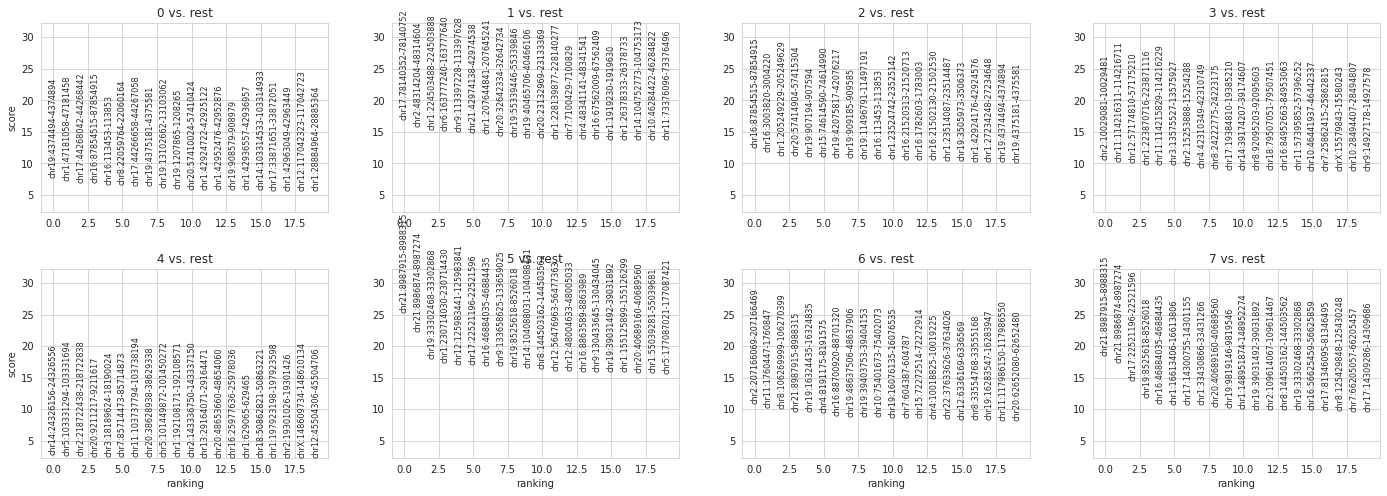

In [24]:
epi.pl.rank_feat_groups(adata)

In [25]:
adata

AnnData object with n_obs × n_vars = 17500 × 1151566
    obs: 'nb_features', 'louvain', 'leiden'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'louvain', 'leiden', 'louvain_colors', 'leiden_colors', 'rank_features_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [34]:
adata.uns['rank_features_groups']['names']

rec.array([('chr19:4374494-4374894', 'chr17:78140352-78140752', 'chr16:87854515-87854915', 'chr2:10029081-10029481', 'chr14:24326156-24326556', 'chr21:8987915-8988315', 'chr2:207166069-207166469', 'chr21:8987915-8988315'),
           ('chr1:47181058-47181458', 'chr2:48314204-48314604', 'chr16:3003820-3004220', 'chr11:114216311-114216711', 'chr5:103331294-103331694', 'chr21:8986874-8987274', 'chr11:1760447-1760847', 'chr21:8986874-8987274'),
           ('chr17:44268042-44268442', 'chr1:224503488-224503888', 'chr1:205249229-205249629', 'chr12:57174810-57175210', 'chr2:218722438-218722838', 'chr19:33302468-33302868', 'chr8:106269999-106270399', 'chr17:22521196-22521596'),
           ('chr16:87854515-87854915', 'chr6:163777240-163777640', 'chr20:57414904-57415304', 'chr1:223870716-223871116', 'chr20:9211217-9211617', 'chr1:230714030-230714430', 'chr21:8987915-8988315', 'chr19:8525618-8526018'),
           ('chr16:113453-113853', 'chr9:113397228-113397628', 'chr19:907194-907594', 'chr11:114

In [38]:
adata.obs

,nb_features,louvain,leiden
index,,,
liver_sample_9_1+AACCAATAACATATGGTACCGTTCGTCTGACAGTCGGCAA,10193.0,7,8
liver_sample_9_1+AACCAATAACATGCTAACCTGTCGACCATTACCAGTTATT,7920.0,5,3
liver_sample_9_1+AACCAATAACCTAAGAGTTACGTTGATGATGAGAAGACCA,13742.0,7,8
liver_sample_9_1+AACCAATAACCTGGCAGCGGTTCTGGCGCACCGGTTAAGT,14533.0,5,3
liver_sample_9_1+AACCAATAACGGTCTAGGAACATATTGCATGAGATACCTC,10521.0,5,3
...,...,...,...
liver_sample_9_1+TTGGACGCGGTAGAACCTCCGATCCATAACTTAATTCGTA,1510.0,6,6
liver_sample_9_1+TTGGAGAACGGCATTAGGCGTTGCCTTATCTTGCTCGATT,4047.0,6,6
liver_sample_9_1+AATTATCTTGGAATGCCTTGTTCTGGCGCACAGTCGGCAA,9896.0,6,6


In [39]:
adata.var_names

Index(['chr1:9955-10355', 'chr1:29163-29563', 'chr1:79215-79615',
       'chr1:102755-103155', 'chr1:267803-268203', 'chr1:276109-276509',
       'chr1:629065-629465', 'chr1:630110-630510', 'chr1:631178-631578',
       'chr1:632120-632520',
       ...
       'chrY:21176813-21177213', 'chrY:21177347-21177747',
       'chrY:21185601-21186001', 'chrY:21583596-21583996',
       'chrY:21586040-21586440', 'chrY:56676947-56677347',
       'chrY:56677442-56677842', 'chrY:56678029-56678429',
       'chrY:56678600-56679000', 'chrY:56707025-56707425'],
      dtype='object', name='index', length=1151566)

In [43]:
adata

AnnData object with n_obs × n_vars = 17500 × 1151566
    obs: 'nb_features', 'louvain', 'leiden'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'louvain', 'leiden', 'louvain_colors', 'leiden_colors', 'rank_features_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [63]:
vars(adata)

{'_is_view': False,
 '_adata_ref': None,
 '_oidx': None,
 '_vidx': None,
 'file': Backing file manager: no file is set.,
 '_X': <17500x1151566 sparse matrix of type '<class 'numpy.float32'>'
 	with 93913563 stored elements in Compressed Sparse Row format>,
 '_n_obs': 17500,
 '_n_vars': 1151566,
 '_obs':                                                     nb_features louvain leiden
 index                                                                         
 liver_sample_9_1+AACCAATAACATATGGTACCGTTCGTCTGA...      10193.0       7      8
 liver_sample_9_1+AACCAATAACATGCTAACCTGTCGACCATT...       7920.0       5      3
 liver_sample_9_1+AACCAATAACCTAAGAGTTACGTTGATGAT...      13742.0       7      8
 liver_sample_9_1+AACCAATAACCTGGCAGCGGTTCTGGCGCA...      14533.0       5      3
 liver_sample_9_1+AACCAATAACGGTCTAGGAACATATTGCAT...      10521.0       5      3
 ...                                                         ...     ...    ...
 liver_sample_9_1+TTGGACGCGGTAGAACCTCCGATCCATAAC...     